In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter


plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
lato_font = {'fontname':'Lato'}
cmap = sns.color_palette('Set2')
height = 2
aspect = 4

In [2]:
static_df = pd.read_csv('results-static.csv')
dynamic_df = pd.read_csv('results-dynamic.csv')
gradcam_df = pd.read_csv('results-gradcam.csv')

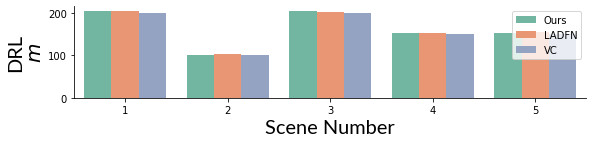

In [3]:
PLOT_NAME = "static-plot"

# drift
# PLOT_TITLE = "Absolute Pose Error (APE) in Static Scenes" 
# PLOT_TITLE_SHORT = "drift"
# YLABEL = "APE\n" + r"$m$"
# g = sns.catplot(x="scene", y="drift", hue="method", kind="bar", data=static_df, palette=cmap, height=height, aspect=aspect)

# curvature
PLOT_TITLE = "Curvature in Static Scenes" 
PLOT_TITLE_SHORT = "curvature"
YLABEL = "DRL\n" + r"$m$"
g = sns.catplot(x="scene", y="DRL", hue="method", kind="bar", data=static_df, palette=cmap, height=height, aspect=aspect)

g._legend.remove()
plt.legend(loc='upper right')
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
# plt.title(PLOT_TITLE, fontsize=20, **lato_font)
plt.xlabel('Scene Number', fontsize=20, **lato_font)
plt.ylabel(YLABEL, fontsize=20, **lato_font)
plt.savefig(PLOT_NAME + "-" + PLOT_TITLE_SHORT + ".png", dpi=600, bbox_inches='tight')

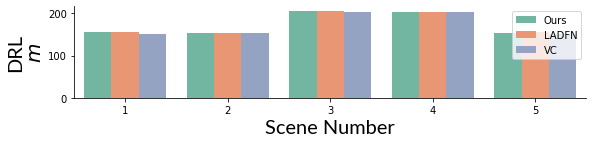

In [4]:
PLOT_NAME = "dynamic-plot"

# PLOT_TITLE = "Absolute Pose Error (APE) in Dynamic Scenes" 
# PLOT_TITLE_SHORT = "drift"
# YLABEL = "APE\n" + r"$m$"
# g = sns.catplot(x="scene", y="drift", hue="method", kind="bar", data=dynamic_df, palette=cmap, height=height, aspect=aspect)

PLOT_TITLE = "Curvature in Dynamic Scenes" 
PLOT_TITLE_SHORT = "curvature"
YLABEL = "DRL\n" + r"$m$"
g = sns.catplot(x="scene", y="DRL", hue="method", kind="bar", data=dynamic_df, palette=cmap, height=height, aspect=aspect)


g._legend.remove()
plt.legend(loc='upper right')
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
# plt.title(PLOT_TITLE, fontsize=20, **lato_font)
plt.xlabel('Scene Number', fontsize=20, **lato_font)
plt.ylabel(YLABEL, fontsize=20, **lato_font)
plt.savefig(PLOT_NAME + "-" + PLOT_TITLE_SHORT + ".png", dpi=600, bbox_inches='tight')

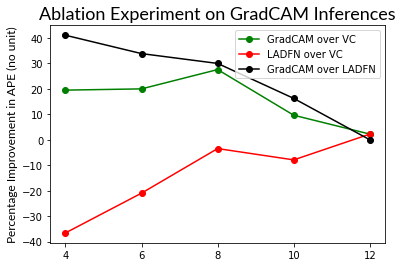

In [5]:
PLOT_NAME = "gradcam-ablations"

PLOT_TITLE = "Ablation Experiment on GradCAM Inferences" 
PLOT_TITLE_SHORT = ""
YLABEL = "Percentage Improvement in APE (no unit)"
cmap = sns.color_palette('Set2')
gradcam = [0.66, 0.84, 1.05, 1.03, 1.31]
ladfn = [1.12, 1.27, 1.5, 1.23, 1.31]
vs = [0.82, 1.05, 1.45, 1.14, 1.34]
gradcam_over_vs = [((vs[i] - gradcam[i])/vs[i])*100 for i in range(5)]
ladfn_over_vs = [((vs[i] - ladfn[i])/vs[i])*100 for i in range(5)]
gradcam_over_ladfn = [((ladfn[i] - gradcam[i])/ladfn[i])*100 for i in range(5)]

plt.plot(gradcam_over_vs, 'go-')
plt.plot(ladfn_over_vs, 'ro-')
plt.plot(gradcam_over_ladfn, 'ko-')
labels_sparse = ["4", "6", "8", "10", "12"]
plt.xticks(ticks=range(5), labels=["4", "6", "8", "10", "12"])
plt.legend(["GradCAM over VC", "LADFN over VC", "GradCAM over LADFN"], loc='upper right')
plt.title(PLOT_TITLE, fontsize=18, **lato_font)
# plt.xlabel('Sparsity (no unit)', fontsize=18, **lato_font)
plt.ylabel(YLABEL, fontsize=12, **lato_font)
plt.savefig(PLOT_NAME + ".png", dpi=600, bbox_inches='tight')

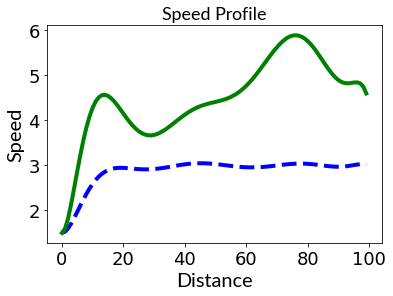

In [6]:
import numpy as np
vt = np.load('fast.npy')
v = np.load('slow.npy')

plt.title("Speed Profile", fontsize=18, **lato_font)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Distance', fontsize=20, **lato_font)
plt.ylabel('Speed', fontsize=20, **lato_font)
plt.plot(v, 'b--', linewidth=4)
plt.plot(vt, 'g', linewidth=4)
plt.savefig('velocity_profile.png', dpi=600, bbox_inches='tight')
plt.show()